# HW02: Practice with $k$NN, decision trees, and feature engineering

[Name: Zeyang Yu / NetID:zyu355.]

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. $k$NN and rescaling

Explore how rescaling can help $k$NN perform well.

## (a) Read a toy concentric ellipses data set.

- Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv](http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv) into a DataFrame.
- Display the first five rows.
- Put its x0 and x1 columns into a feature array X.
- Put its y column into a label array y.
- Split the data into 75% training and 25% testing using random_state=0.

In [63]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv')
print(df.head())
X = df[['x0', 'x1']].iloc[:,0:2].to_numpy()
y = df['y'].iloc[:].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

      x0     x1  y
0 -1.937 -0.006  0
1 -1.622 -0.057  0
2 -0.791 -0.200  0
3 -0.614 -0.171  0
4 -0.490 -0.154  0


## (b) Plot the data.

- Put x0 on the $x$ axis and x1 on the $y$ axis.
- Plot points with these colors:
  - training 0 = red
  - training 1 = blue
  - testing 0 = orange
  - testing 1 = lime (a bright green)
- Use $x$ and $y$ axis limits of $(-6, 6)$.
- Include a legend.

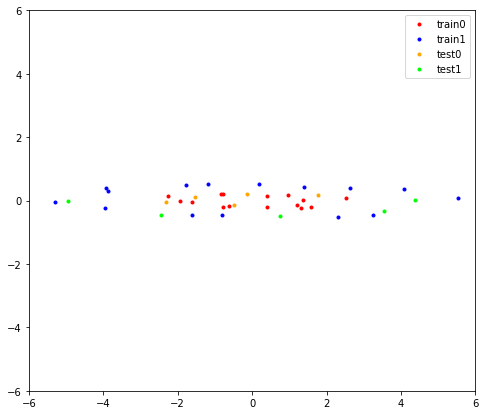

In [64]:
# draw points
plt.xlim(-6, 6)
plt.ylim(-6, 6)
n_X_train = X_train.shape[0]
        
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], '.r', label='train0')  
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], '.b', label='train1') 
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], '.', color = 'orange', label='test0') 
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], '.', color = 'lime', label='test1') 

plt.legend()

## (c) Train a $k$NN classifier and report its accuracy on test data.
- Use $k = 3$ and the (default) euclidean metric.
- Train on the training data.
- Report the accuracy on the test data by writing a line like `Test accuracy is 0.5`
  (0.5 is not correct).

In [65]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'Test accuracy is {score:.3}.')

Test accuracy is 0.8.


## (d) Now rescale the features using standardization, but be careful:
- Fit the scaler only to the training features. (We could cause [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage-during-pre-processing) that optimistically
  biases our model if we included the test data while fitting the scaler.)
- Transform the training features.
- Use the same scaler, without fitting again, to transform the test features.

  Hint: I showed a ".fit_transform()" method that finds the mean and standard deviation
  and then rescales the features in one step. There are also separate ".fit()" and ".transform()"
  methods, the first of which finds the mean and standard deviation, and the second of which 
  transforms the data. You should use ".transform()" on the test features, without using
  ".fit_transform()" or ".fit()" on the test features.

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## (d) Repeat steps (b) and (c), this time on the rescaled data.

Test accuracy is 1.0.


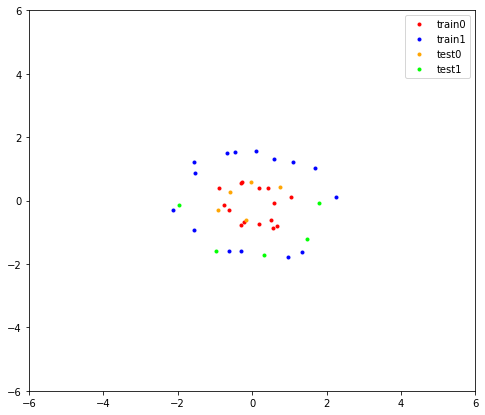

In [67]:
# draw points
plt.xlim(-6, 6)
plt.ylim(-6, 6)
n_X_train_scaled = X_train_scaled.shape[0]

plt.plot(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], '.r', label='train0')  
plt.plot(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], '.b', label='train1') 
plt.plot(X_test_scaled[y_test==0, 0], X_test_scaled[y_test==0, 1], '.', color = 'orange', label='test0') 
plt.plot(X_test_scaled[y_test==1, 0], X_test_scaled[y_test==1, 1], '.', color = 'lime', label='test1') 
plt.legend()

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
print(f'Test accuracy is {score:.3}.')

Notice that some information in the raw x1 feature was concealed from $k$NN in step (b) because
x1's scale was much smaller than x0's scale. Rescaling the features let $k$NN do its job well
in step (d).

# 2 Decision trees and rescaling

## (a) Read the ellipses data again to get a clean, unscaled copy.
Split it again using random_state=0.

In [68]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv')
feature_names = ['x0', 'x1']
X = df[feature_names].iloc[:,0:2].to_numpy()
y = df['y'].iloc[:].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## (b)  Train a decision tree classifier and report its accuracy on test data.
- Train on the training data.
- Report the accuracy on test data as above.
- Use tree.plot_tree() to display your tree.
  - Include feature_names to make the tree easy to read.

|--- x1 <= 0.26
|   |--- x1 <= -0.24
|   |   |--- class: 1
|   |--- x1 >  -0.24
|   |   |--- x0 <= -3.79
|   |   |   |--- class: 1
|   |   |--- x0 >  -3.79
|   |   |   |--- x0 <= 4.02
|   |   |   |   |--- class: 0
|   |   |   |--- x0 >  4.02
|   |   |   |   |--- class: 1
|--- x1 >  0.26
|   |--- class: 1

Accuracy on training data is clf.score(X_test, y_test)=1.0.


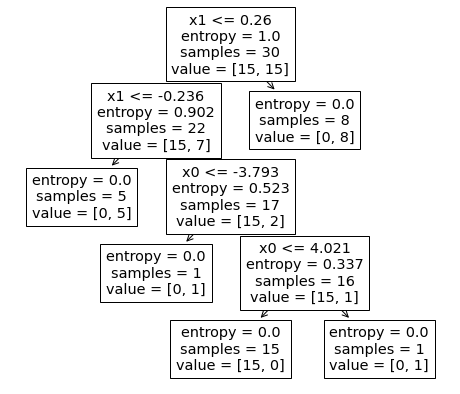

In [69]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (8, 7) 
tree.plot_tree(clf, feature_names=feature_names)
print(export_text(clf, feature_names=feature_names))
print(f'Accuracy on training data is clf.score(X_test, y_test)={clf.score(X_test, y_test)}.')

### Are both features used in the decision-making? Answer in a markdown cell, giving the number of times each feature is used.

#### Yes, both features used in the decision-making. 
#### The number of times: x0:2 and x1:2.

### Why does feature scaling seem unnecessary for an ID3 decision tree? Answer in a markdown cell.

#### The reason is that ID decision tree is only splitting a node based on a single feature and so that it is not sensitive to the the variance in the data.

# 3 One-hot encoding and data imputation on a Titanic data set.

## (a) Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

- Display the  first seven rows.

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

In [70]:
data = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv')
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Try to train a $k$NN model to predict $y=$ 'Survived' from these features: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'.
- Use $k = 3$ and the (default) euclidean metric.
- Notice that it fails with the error "ValueError: could not convert string to float: 'male'".
- Comment out your .fit() line.

In [71]:
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = data[feature_names].iloc[:,:].to_numpy()
y = data['Survived'].iloc[:].to_numpy()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
#knn.fit(X_train, y_train)

### Try to train again, this time without the 'Sex' feature.
- Notice that it fails because "Input contains NaN".
- Comment out your .fit() line.
- Run `X.isna().any()` (where X is the name of your DataFrame of features) to see that
  the 'Age' feature has missing values. (You can see the first missing value in
  the sixth row that you displayed above.)

In [72]:
feature_names = ['Pclass', 'Age', 'SibSp', 'Parch']
X = data[feature_names].iloc[:,:].to_numpy()
y = data['Survived'].iloc[:].to_numpy()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
#knn.fit(X_train, y_train)
data['Age'].isna().any()

True

### Train without the 'Sex' and 'Age' features.
- Report accuracy on the training data with a line of the form
  `Accuracy on training data is  0.500` (0.500 is not correct).

In [73]:
feature_names = ['Pclass', 'SibSp', 'Parch']
X = data[feature_names].to_numpy()
y = data['Survived'].to_numpy()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
score = knn.score(X, y)
print(f'Accuracy on training data is {score:.3}.')

Accuracy on training data is 0.633.


## (b)  Use one-hot encoding
to include a binary 'male'  feature made from the 'Sex' feature. (Or include a binary 'female'
feature, according to your preference. Using both is unnecessary since either is the logical
negation of the other.) That is, train on these features: 'Pclass', 'SibSp', 'Parch', 'male'.

- Report training accuracy as before.

In [74]:
data = data.join(pd.get_dummies(data.Sex, drop_first=False))
feature_names = ['Pclass', 'SibSp', 'Parch', 'male']
X = data[feature_names].iloc[:,:].to_numpy()
y = data['Survived'].iloc[:].to_numpy()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
score = knn.score(X, y)
print(f'Accuracy on training data is {score:.3}.')

Accuracy on training data is 0.744.


## (c) Use data imputation
to include an 'age' feature made from 'Age' but replacing each missing value with the median
of the non-missing ages. That is, train on these features: 'Pclass', 'SibSp', 'Parch', 'male',
'age'.

- Report training accuracy as before.

In [75]:
imp = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)
data.Age = imp.fit_transform(data.Age.to_numpy().reshape(-1, 1)) 
feature_names = ['Pclass', 'SibSp', 'Parch', 'male', 'Age']
X = data[feature_names].to_numpy()
y = data['Survived'].to_numpy()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
score = knn.score(X, y)
print(f'Training accuracy is {score:.3}.')

Training accuracy is 0.861.
